In [1]:
import numpy as np
import matplotlib.pyplot as plt 

np.set_printoptions(suppress=True)

In [2]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes
    a covariance matrix from points in X1 and X2.
    Args:
    X1: Array of m points (m x d).
    X2: Array of n points (n x d).
    Returns:
    Covariance matrix (m x n).
    '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [3]:
def actual_function():
    inp = np.arange(-3*np.pi, 3*np.pi, 6*np.pi/100);
    out = np.sin(inp)
    return inp, out

In [4]:
def error_computer(functionvalue, predictedvalue):
    #print('shape: ',functionvalue.shape)
    #print('shape 2 : ',predictedvalue.shape)
    error = np.dot((functionvalue - predictedvalue).T,(functionvalue - predictedvalue))/functionvalue.shape[0]
    return error 

In [5]:
def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[],title=None):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    plt.figure(figsize=(15,15))
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    
    inp, out = actual_function()
    plt.plot(inp, out, label = 'Actual function')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
        
        #plt.axhline(y=0, color='k')
        plt.title(title)
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
        inp, out = actual_function()
        #plt.plot(inp, out, label = 'Actual function')
        #plt.legend()
        #plt.axhline(y=0, color='k')
        plt.title(title)
    plt.legend()
    plt.show()


In [6]:
def sample_generator(mu, covariance, n):
    samples = np.random.multivariate_normal(mu.ravel(), covariance, n)
    return samples 

In [7]:
# # Finite number of points
X = np.arange(-10, 10, 0.2).reshape(-1, 1)
# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

In [8]:
def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution
    from m training data X_train and Y_train and n new inputs X_s.
    Args:
    X_s: New input locations (n x d).
    X_train: Training locations (m x d).
    Y_train: Training targets (m x 1).
    l: Kernel length parameter.
    sigma_f: Kernel vertical variation parameter.
    sigma_y: Noise parameter.
    Returns:
    Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = np.linalg.inv(K)
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)
    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    return mu_s, cov_s

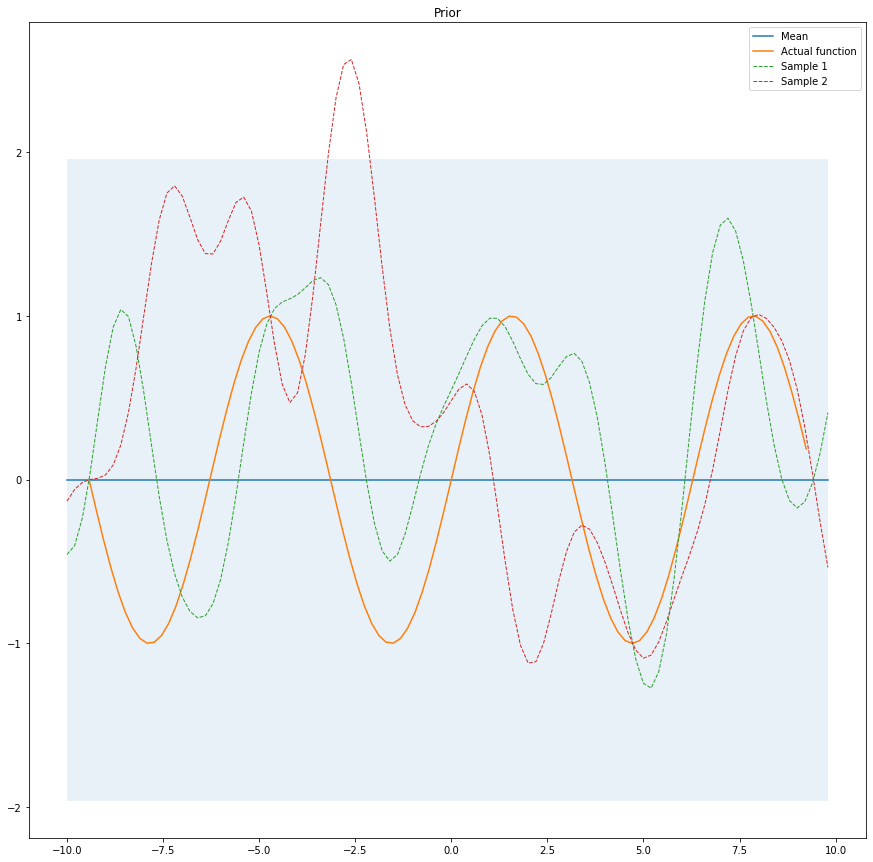

mean square error of sample  0 : 0.6519127424129542
mean square error of sample  1 : 1.548114666483337


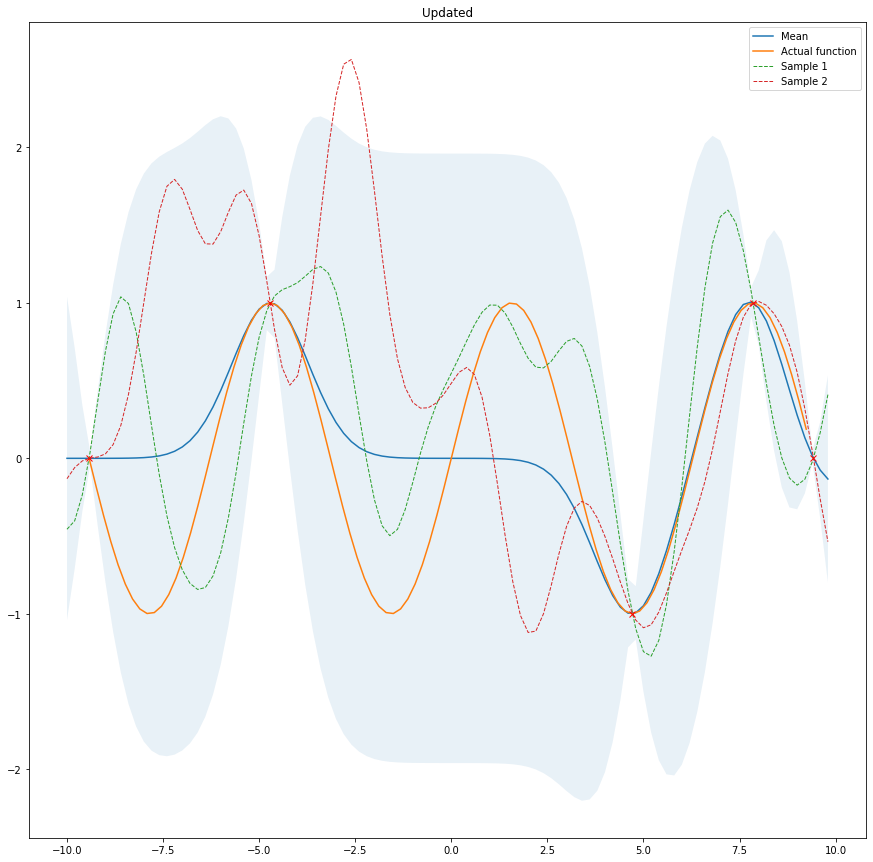

In [11]:
# Noise free training data
X_train = np.array([-3*np.pi, -3*np.pi/2, 3*np.pi/2, 5*np.pi/2, 3*np.pi]).reshape(-1, 1)
Y_train = np.sin(X_train)
#plt.scatter(X_train, Y_train, label='Data')
# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)
samples = sample_generator(mu_s.ravel(), cov_s, 2)
plot_gp(mu, cov, X, samples=samples,title='Prior')

act_inp, act_out = actual_function()
    
for iterator in range(len(samples)):
    error_sample = error_computer(act_out, samples[iterator,:])
    print('mean square error of sample ',iterator,':',np.mean(error_sample))

#print('samples: ',samples)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples,title='Updated')